
Mission : Importer un fichier CSV dans une base de données SQL à l'aide d'un script Python


In [ ]:

# Étape 1 : Préparation des données 

import pandas as pd

data = pd.read_csv('./titanic.csv', index_col=False)

print(data)


In [ ]:

# Étape 2 : Connexion au serveur de base de données et création de la base de donnée

import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

conn = None
try:
    conn = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="the_password"
    )

    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

    # create a cursor
    cursor = conn.cursor()

    # create DB
    cursor.execute('DROP DATABASE IF EXISTS workshop_sql;')
    cursor.execute("CREATE DATABASE workshop_sql")

    # close communication with PostgreSQL
    cursor.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()
        print('DB connection closed.')
            

In [ ]:

# Étape 3 : Création d'une table et import du CSV 

# récupération des types de données 
types = data.dtypes

print(types)
"""
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
"""

conn = None
try:
    conn = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="the_password",
        database="workshop_sql"
    )
    
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

    # create a cursor
    cursor = conn.cursor()

    # create table
    cursor.execute('DROP TABLE IF EXISTS titanic;')

    statement = (
        """
        CREATE TABLE titanic (
            PassengerId SERIAL PRIMARY KEY,
            Survived INTEGER,
            Pclass INTEGER,
            Name VARCHAR(255),
            Sex VARCHAR(255),
            Age FLOAT,
            SibSp INTEGER,
            Parch INTEGER,
            Ticket VARCHAR(255),
            Fare VARCHAR(255),
            Cabin VARCHAR(255),
            Embarked VARCHAR(255)
        )
        """
    )

    cursor.execute(statement)

    # insert data from CSV
    for i,row in data.iterrows():
        insertion = "INSERT INTO titanic VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        cursor.execute(insertion, tuple(row))
    
    # close communication with PostgreSQL
    cursor.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()
        print('DB connection closed.')


In [ ]:

# Étape 4 : Récupération des données depuis la base de données 

conn = None
try:
    conn = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="the_password",
        database="workshop_sql"
    )
    
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

    # create a cursor
    cursor = conn.cursor()

    # get data from DB
    statement = "SELECT * FROM titanic"
    cursor.execute(statement)

    # fetch all records
    result = cursor.fetchall()
    for i in result:
        print(i)
    
    # close communication with PostgreSQL
    cursor.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()
        print('DB connection closed.')



Table titanic dans pgadmin 
    
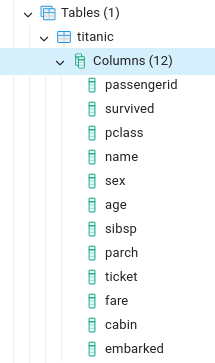



Les premiers enregistrements de la table titanic dans pgadmin 

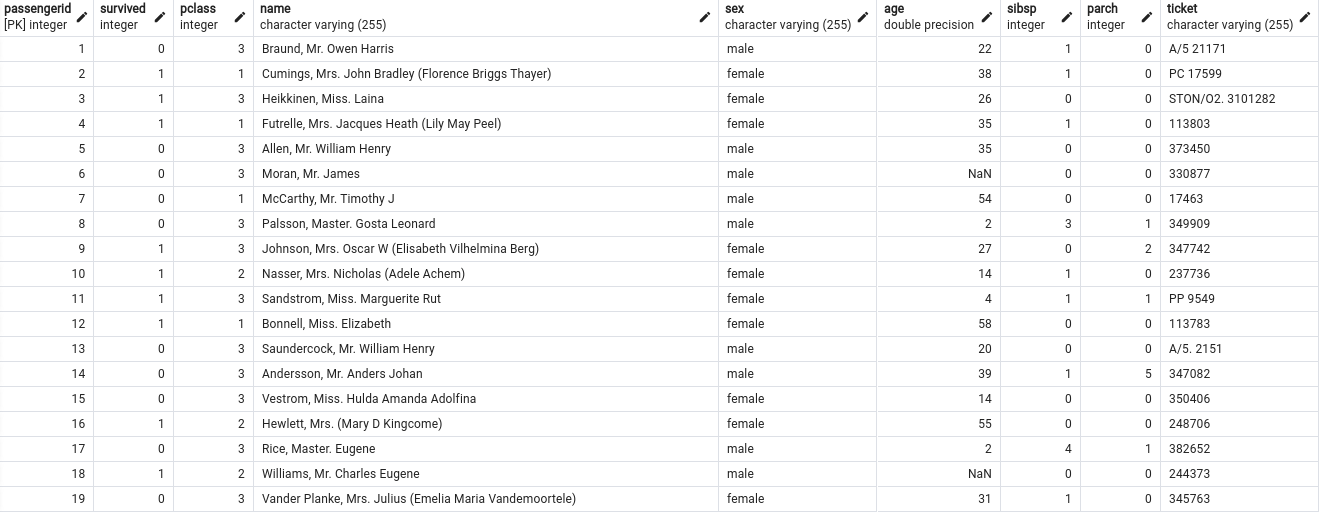
